In [1]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LassoCV
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

SEED = 0

In [2]:
df_review_normalised = pd.read_csv("review_camera_normalised.csv")
df_review_normalised = df_review_normalised.dropna()

C:\Users\mikec\AppData\Local\Temp\ipykernel_12664\1631210238.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_normalised = pd.read_csv("review_camera_normalised.csv")


In [3]:
IS: pd.DataFrame
OS: pd.DataFrame
IS, OOS = train_test_split(
    df_review_normalised,
    test_size=0.2,
    random_state=SEED,
)

In [4]:
df_review_normalised_subset = IS.sample(
    # n=int(5e4),
    frac=1.0,
    random_state=SEED,
)
df_review_normalised_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211872 entries, 738804 to 1000258
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     211872 non-null  float64
 1   verified    211872 non-null  bool   
 2   reviewTime  211872 non-null  object 
 3   asin        211872 non-null  object 
 4   reviewText  211872 non-null  object 
 5   vote        211872 non-null  object 
 6   image       211872 non-null  bool   
 7   Year        211872 non-null  int64  
 8   price       211872 non-null  float64
 9   main_cat    211872 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 15.0+ MB


In [5]:
df_review_normalised_subset

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
738804,5.0,True,2013-04-06,B0056HNTAU,positive review sure add frame upgrade pro fra...,16,False,2013,5.57,Camera & Photo
386767,5.0,True,2016-08-15,B001FB6PJI,lens perfect real estate photography good opti...,2,False,2016,238.00,Camera & Photo
62379,5.0,True,2013-07-06,B00007GQLS,love len dead tie usm lens forever believe bel...,5,False,2013,72.83,Camera & Photo
1030598,5.0,True,2014-06-24,B00AXTQRSC,lot research buy camera look canon camera scou...,3,False,2014,599.99,Camera & Photo
438194,5.0,True,2010-01-30,B001SER45G,professional photographer want little camera p...,3,False,2010,79.27,Camera & Photo
...,...,...,...,...,...,...,...,...,...,...
1023342,1.0,True,2014-03-24,B00ATE7TYC,purchase camera college field trip daughter ne...,2,False,2014,95.00,Camera & Photo
38311,5.0,False,2002-02-10,B00005QFZF,ok love fall pocket ski lift outperform hand c...,34,False,2002,34.95,Camera & Photo
2485378,5.0,True,2018-08-14,B01EINBS14,div block section spacing small spacing mini v...,2.0,False,2018,20.70,Camera & Photo
71541,5.0,True,2006-11-09,B000092M1T,lens camera work great camera shoot sporting e...,7,False,2006,63.68,Camera & Photo


In [6]:
df_only_one_and_five = df_review_normalised_subset[
    (df_review_normalised_subset["overall"] == 1.0)
    | (df_review_normalised_subset["overall"] == 5.0)
]
df_only_one_and_five

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
738804,5.0,True,2013-04-06,B0056HNTAU,positive review sure add frame upgrade pro fra...,16,False,2013,5.57,Camera & Photo
386767,5.0,True,2016-08-15,B001FB6PJI,lens perfect real estate photography good opti...,2,False,2016,238.00,Camera & Photo
62379,5.0,True,2013-07-06,B00007GQLS,love len dead tie usm lens forever believe bel...,5,False,2013,72.83,Camera & Photo
1030598,5.0,True,2014-06-24,B00AXTQRSC,lot research buy camera look canon camera scou...,3,False,2014,599.99,Camera & Photo
438194,5.0,True,2010-01-30,B001SER45G,professional photographer want little camera p...,3,False,2010,79.27,Camera & Photo
...,...,...,...,...,...,...,...,...,...,...
1023342,1.0,True,2014-03-24,B00ATE7TYC,purchase camera college field trip daughter ne...,2,False,2014,95.00,Camera & Photo
38311,5.0,False,2002-02-10,B00005QFZF,ok love fall pocket ski lift outperform hand c...,34,False,2002,34.95,Camera & Photo
2485378,5.0,True,2018-08-14,B01EINBS14,div block section spacing small spacing mini v...,2.0,False,2018,20.70,Camera & Photo
71541,5.0,True,2006-11-09,B000092M1T,lens camera work great camera shoot sporting e...,7,False,2006,63.68,Camera & Photo


<Axes: title={'center': 'Number of reviews with score 1 or 5'}, xlabel='overall'>

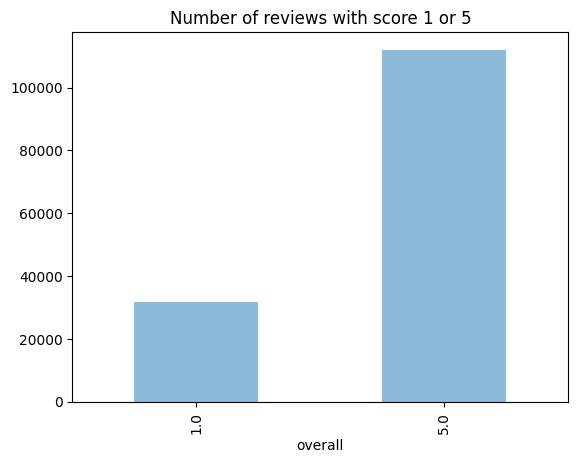

In [10]:
df_only_one_and_five["overall"].value_counts().sort_index().plot.bar(alpha=0.5, title="Number of reviews with score 1 or 5")

In [11]:
# Lasso CV
vectorizer = CountVectorizer(min_df=1)
undersampler = RandomUnderSampler()
lasso_cv = LassoCV(
    cv=5,
    random_state=SEED,
    alphas=[0.001, 0.01, 0.1, 1, 10, 100],
    n_jobs=-1,
)
ml_pipeline = make_pipeline(vectorizer, undersampler, lasso_cv)

X_train, X_test, y_train, y_test = train_test_split(
    df_only_one_and_five["reviewText"],
    df_only_one_and_five["overall"],
    test_size=0.25,
    random_state=SEED,
)
ml_pipeline.fit(X_train, y_train)
vectorizer_step = ml_pipeline.named_steps["countvectorizer"]

X_train_dfm = vectorizer_step.transform(X_train)
X_train_dense = X_train_dfm.todense()
feature_names = vectorizer_step.get_feature_names_out()
X_train_dfm_df = pd.DataFrame(X_train_dense, columns=feature_names)

y_pred = ml_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
best_alpha = ml_pipeline.named_steps["lassocv"].alpha_
print(f"Best alpha: {best_alpha}")

Mean Squared Error: 2.125009881268998
Best alpha: 0.001


<Axes: title={'center': 'Out of sample rating distribution'}, xlabel='overall'>

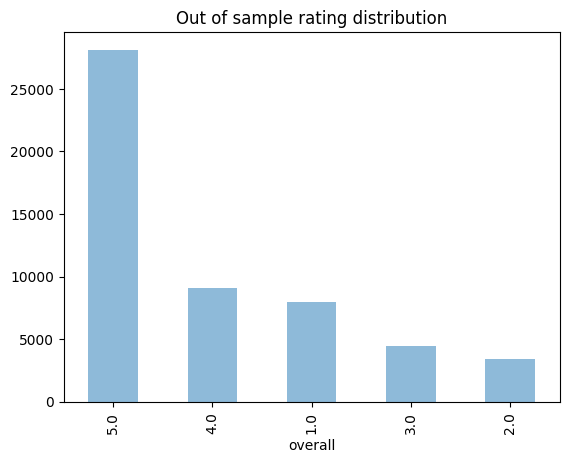

In [12]:
OOS["overall"].value_counts().plot.bar(alpha=0.5, title="Out of sample rating distribution")

In [13]:
results = []
for i in range(1, 6):
    df_given_score = OOS[(OOS["overall"] == float(i))]
    y_pred: np.ndarray = ml_pipeline.predict(df_given_score["reviewText"])
    results.append([i, y_pred.mean(), y_pred.std()])
results = pd.DataFrame(results, columns=["Score", "Mean", "Std"])
results

,Score,Mean,Std
0,1,2.045556,0.950748
1,2,2.371530,0.941886
2,3,2.893670,0.950336
3,4,3.633759,1.065282
4,5,3.948595,1.061044


In [ ]:
results.to_csv("lasso-result.csv")

In [ ]:
results = pd.read_csv("lasso-result.csv")

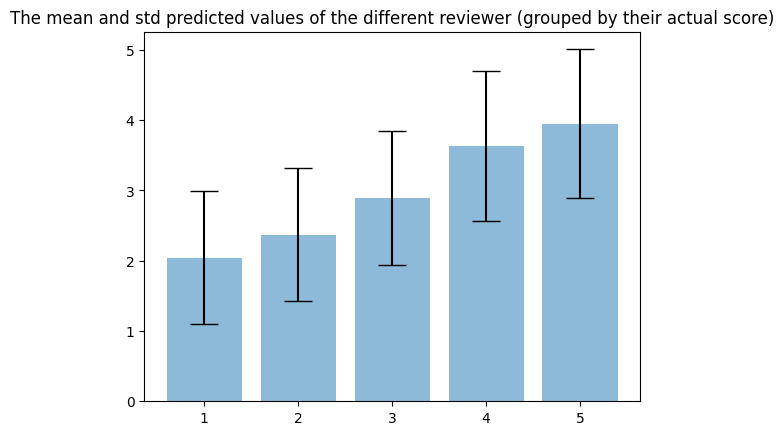

In [21]:
plt.title('The mean and std predicted values of the different reviewer (grouped by their actual score)')
plt.bar(
    list(range(1, 6)),
    results["Mean"],
    yerr=results["Std"],
    align="center",
    alpha=0.5,
    ecolor="black",
    capsize=10,
)
plt.show()

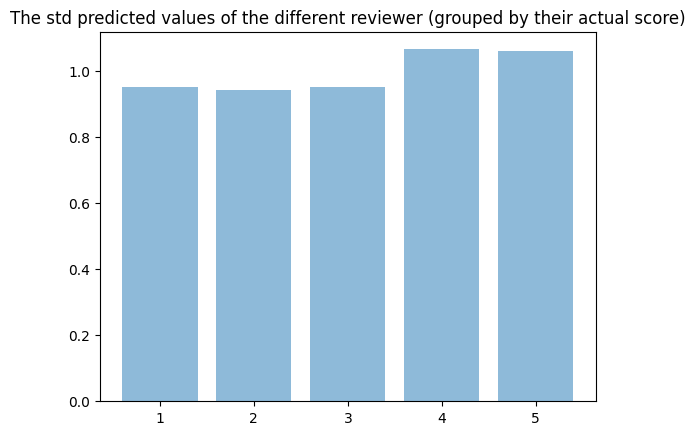

In [22]:
plt.title('The std predicted values of the different reviewer (grouped by their actual score)')
plt.bar(
    list(range(1, 6)),
    results["Std"],
    align="center",
    alpha=0.5,
)
plt.show()

In [23]:
analyser = SentimentIntensityAnalyzer()

In [24]:
results = []
for i in range(1, 6):
    reviewText_given_score = IS[(IS["overall"] == float(i))]["reviewText"].tolist()
    for review in reviewText_given_score:
        results.append([i, review, analyser.polarity_scores(review)["compound"]])
results = pd.DataFrame(results, columns=["Score", "review", "polarity"])
results

,Score,review,polarity
0,1,purchase daughter trip arrival fully charge ba...,-0.5994
1,1,camera great take photo good iq review purchas...,0.9552
2,1,buy possible portable spot scope impossible ho...,0.1531
3,1,camera work superior quality problem fix twice...,0.5106
4,1,terrible think acceptable,-0.2023
...,...,...,...
211867,5,lightweight comfortable nice snap feature down...,0.8481
211868,5,good product layer security like customization...,0.8625
211869,5,problem resolve quickly impressed fast issue f...,0.6705
211870,5,video backdrop picture help quality business alot,0.4019


In [25]:
results.to_csv("vader-result.csv")

In [26]:
results = pd.read_csv("vader-result.csv")

In [27]:
aggregated = (
    results.groupby(['Score'])["polarity"].agg([('polarity mean', 'mean'), ('polarity std', 'std')])
    .reset_index()                                          # make groupers into columns
)
aggregated

,Score,polarity mean,polarity std
0,1,0.066097,0.592353
1,2,0.324125,0.580421
2,3,0.516455,0.510162
3,4,0.713073,0.388313
4,5,0.762948,0.327301


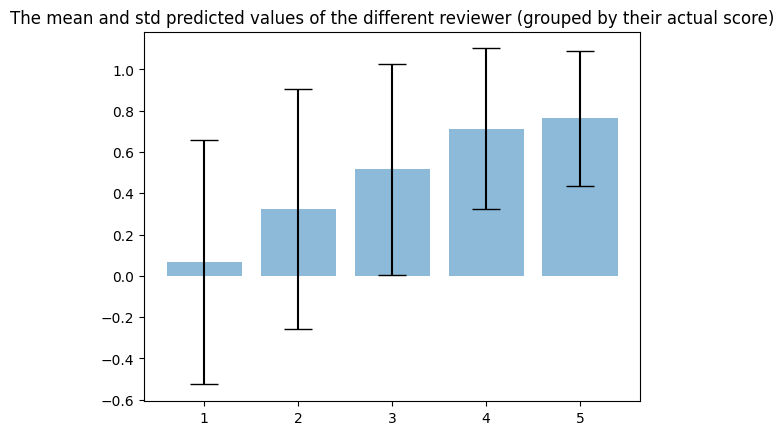

In [29]:
plt.title('The mean and std predicted values of the different reviewer (grouped by their actual score)')
plt.bar(
    list(range(1, 6)),
    aggregated["polarity mean"],
    yerr=aggregated["polarity std"],
    align="center",
    alpha=0.5,
    ecolor="black",
    capsize=10,
)
plt.show()

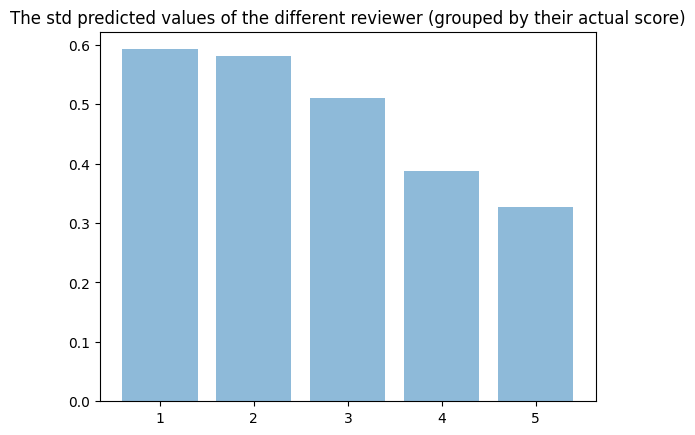

In [30]:
plt.title('The std predicted values of the different reviewer (grouped by their actual score)')
plt.bar(
    list(range(1, 6)),
    aggregated["polarity std"],
    align="center",
    alpha=0.5,
)
plt.show()

In [31]:
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("assemblyai/distilbert-base-uncased-sst2")
model = AutoModelForSequenceClassification.from_pretrained(
    "assemblyai/distilbert-base-uncased-sst2"
)

c:\Users\mikec\Desktop\Imperial\TMEF\Amazon-Review-TMEF-Project\text-mining\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
results = []
for i in range(1, 6):
    reviewText_given_score = IS[(IS["overall"] == float(i))]["reviewText"].tolist()
    for review in reviewText_given_score:
        tokenized_segments = tokenizer(
            [review],
            return_tensors="pt",
            padding=True,
            truncation=True,
        )
        tokenized_segments_input_ids, tokenized_segments_attention_mask = (
            tokenized_segments.input_ids,
            tokenized_segments.attention_mask,
        )
        model_predictions = F.softmax(
            model(
                input_ids=tokenized_segments_input_ids,
                attention_mask=tokenized_segments_attention_mask,
            )["logits"],
            dim=1,
        )
        # Positive probability
        results.append([i, review, model_predictions[0][1].item()])
results = pd.DataFrame(results, columns=["Score", "review", "polarity"])
results

,Score,review,polarity
0,1,purchase daughter trip arrival fully charge ba...,0.186164
1,1,camera great take photo good iq review purchas...,0.529751
2,1,buy possible portable spot scope impossible ho...,0.328670
3,1,camera work superior quality problem fix twice...,0.169831
4,1,terrible think acceptable,0.065454
...,...,...,...
211867,5,lightweight comfortable nice snap feature down...,0.970728
211868,5,good product layer security like customization...,0.612275
211869,5,problem resolve quickly impressed fast issue f...,0.922280
211870,5,video backdrop picture help quality business alot,0.911837


In [33]:
results.to_csv("distilbert-result.csv")

In [34]:
results = pd.read_csv("distilbert-result.csv")

In [35]:
aggregated = (
    results.groupby(['Score'])["polarity"].agg([('polarity mean', 'mean'), ('polarity std', 'std')])
    .reset_index()                                          # make groupers into columns
)
aggregated

,Score,polarity mean,polarity std
0,1,0.278845,0.233929
1,2,0.368180,0.248247
2,3,0.457225,0.258633
3,4,0.588520,0.259220
4,5,0.697189,0.254882


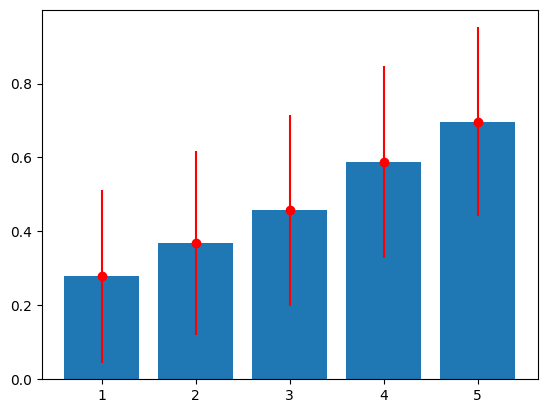

In [36]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity mean"],
)
plt.errorbar(
    list(range(1, 6)),
    aggregated["polarity mean"],
    yerr=aggregated["polarity std"],
    fmt="o",
    color="r",
)
plt.show()

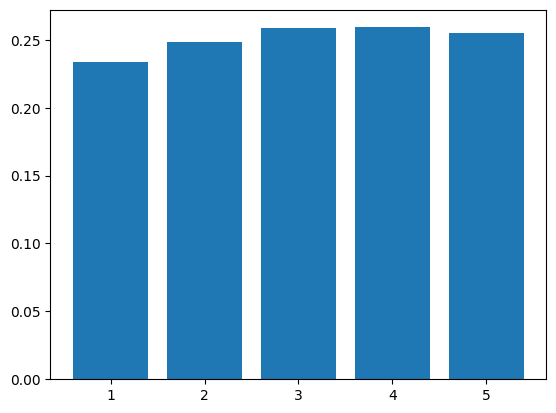

In [37]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity std"],
)
plt.show()